<a href="https://colab.research.google.com/github/kwanda2426/unsupervised-predict-streamlit-template/blob/master/Team_14%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg">

<img src="https://github.com/Explore-AI/Pictures/blob/master/sql_tmdb.jpg?raw=true" width=90%/>

# Streamlit-based Movie Recommender System

## Team 14 : 

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Model Building And Evaluation](#model)
7. [Model Hyperparameter Tuning](#tuning)
8. [Conclusion](#conclusion)
9. [References](#references)
 

<a id="intro"></a>
# 1. **Introduction**

In our daily life when we are shopping online, or looking for a movie to watch, we normally ask our friends or search for it. And when they recommend something that we do not like yet they enjoyed it. what a waste of time right. So what about if there is a system that can understand you, and recommend for you based on your interests, that would be so cool.

The growth of the internet has resulted in an enormous amount of online data and information available to us. Tools like a recommender system allow us to filter the information which we want or need. Recommender systems can be utilized in many contexts, one of which is a playlist generator for video, movie or music services. 
Recommendation systems are becoming increasingly important in today’s extremely busy world. People are always short on time with the myriad tasks they need to accomplish in the limited 24 hours. Therefore, the recommendation systems are important as they help them make the right choices, without having to expend their cognitive resources.

### **Problem Statement**
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals are exposed to the content that is relevant to them in one way or another. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options. If customers are not exposed to a content relevant to them, may decide to look for alternatives which may provide better content.

### **Objectives**

The key objective is to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

### **Literature Review**

**What are recommender systems?**

Simply put, recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them. 

The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

#### Content-Based Filtering

Content-based filtering is a type of recommender system that attempts to guess what a user may like based on that user's activity. Content-based filtering makes recommendations by using keywords and attributes assigned to objects in a database (e.g., items in an online marketplace) and matching them to a user profile.

**Why use content-based filtering?**
- No data from other users is required to start making recommendations.
- Recommendations are highly relevant to the user.
- You avoid the “cold start” problem.
- Recommendations are transparent to the user. Highly relevant recommendations send a message of openness to the user, bolstering their trust level in offered recommendations.


**Challenges of content-based filtering**
- There’s a lack of novelty and diversity.
- Scalability is a challenge. Every time a new product or service or new content is added, its attributes must be defined and tagged.
- Attributes may be incorrect or inconsistent. Content-based recommendations are only as good as the subject-matter experts tagging items.


#### Collaborative Filtering
The idea behind collaborative filtering is to consider users’ opinions on different videos and recommend the best video to each user based on the user’s previous rankings and the opinion of other similar types of users.

**Why use collaborative filtering?**
- It does not need a movie’s side knowledge like genres.
- It uses information collected from other users to recommend new items to the current user.
- Even when no information on an item is available, we still can predict the item rating without waiting for a user to purchase it.
- Captures the change in user interests over time: Focusing solely on content does not provide any flexibility on the user's perspective and their preferences.


**Challenges of collaborative filtering**
- 




<a id="data"></a>
# 2. **Data Collection**

## **Import Libraries**

In [ ]:
!pip install comet_ml
!pip install surprise

In [5]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="cDBGt9YOCyyinNTUvxRUB3hxd",
    project_name="streamlit-based-movie-recommender-system",
    workspace="kwanda2426",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kwanda2426/streamlit-based-movie-recommender-system/d69f8ff97ef5447fa556f633a134fb40



We use comet to run different experiments while saving the .

In [1]:

# Data manipulation
import pandas as pd
import numpy as np

# datetime
import datetime

# Libraries for data preparation and model building
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
import recmetrics
from sklearn.preprocessing import MaxAbsScaler
from surprise.accuracy import rmse
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
# saving model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

C:\Users\thaba\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thaba\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\thaba\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ModuleNotFoundError: No module named 'recmetrics'

### **Loading Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

The basic process of loading data from a CSV file into a Pandas DataFrame (with all going well) is achieved using the “read_csv” function in Pandas.

In [17]:
# imdb
imdb_df = pd.read_csv('C:/Users/Tshegofatso/Downloads/edsa-movie-recommendation-wilderness/imdb_data.csv')

# movies
movies_df = pd.read_csv('C:/Users/Tshegofatso/Downloads/edsa-movie-recommendation-wilderness/movies.csv')

# movies
tags_df = pd.read_csv('C:/Users/Tshegofatso/Downloads/edsa-movie-recommendation-wilderness/tags.csv')

# train 
train = pd.read_csv('C:/Users/Tshegofatso/Downloads/edsa-movie-recommendation-wilderness/train.csv')

# test
test = pd.read_csv('C:/Users/Tshegofatso/Downloads/edsa-movie-recommendation-wilderness/test.csv')

<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understandable format and useful. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:

- **Data cleaning**

- **Table merging process**

- **Dealing with missing values**

### Data cleaning

Data cleaning is important because it improves your data quality and in doing so, increases overall productivity. When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information. We aim to determine inaccurate, incomplete, or unreasonable data and then improve quality by correcting detected errors and omissions.

In [31]:
# create copies of the dataframes

imdb_df = imdb_df.copy()
movies_df = movies_df.copy()
train_df = train.copy()
test_df = test.copy()

In [32]:
# merging dataframe

train_df = pd.merge(movies_df, imdb_df, on = 'movieId')

### Checking for missing values

The problem of missing value is quite common in many real-life datasets. Missing value can bias the results of the machine learning models and/or reduce the predictive accuracy of the model, hence it is crucial to know how much is missing and what to do with that.

In [33]:
# Percentage of missing values
(train_df.isnull().sum()/len(train_df))*100

movieId           0.000000
title             0.000000
genres            0.000000
title_cast       38.868334
director         38.281187
runtime          45.624548
budget           70.711011
plot_keywords    42.153945
dtype: float64

We can see that **title_cast** is missing about **36.9%**, the **director** column is missing **36.2%**, **runtime** is missing **44.3%**, **budget** is missing **71.0%**, **plot_keywords** is missing **40.6%**.
The **budget** column since we missing a lot of data we will **drop** the column since **we can't make reliable analysis on it** and the others we can't impute reliable like the cast. The function that removes noise deals with the missing values.

#### Removing noise

Data that can not be processed/interpreted by a machine is classified as noisy data. Text data contain a lot of noise, this comes in a form of special characters such as hashtags, punctuation and numbers.

- We start by changing the datatype of text data to string for better handling and manipulation.

In [34]:
# change data types
train_df['genres'] = train_df.genres.astype(str)
train_df['title_cast'] = train_df.title_cast.astype(str)
train_df['director'] = train_df.director.astype(str)
train_df['plot_keywords'] = train_df.plot_keywords.astype(str)

- Change the text to lower case.

- Replace the vertical bar with a comma.

In [35]:
# Every genre is separated by a | 
train_df['genres'] = train_df['genres'].map(lambda x: x.lower().split('|'))

# Every title cast is separated by a | so we simply have to call the split function on | and separate them by ,
train_df['title_cast'] = train_df['title_cast'].str.split('|')

# And we will do the same thing for the plot keywords
train_df['plot_keywords'] = train_df['plot_keywords'].str.split('|')

Combine the name and surname in the title_cast and director columns, hence creating one word for the uniqueness of a person's name. If no name exists, the function will leave a space.

In [36]:
def string_function(x):
    """combines name and surname into one name
    and return results as one name.
    
    if no name exists returns a space"""
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [37]:
cols = ['title_cast','director']

for col in cols:
    train_df[col] = train_df[col].apply(string_function)

The resulting data has every text column in lower case, separated by a comma. The name and surname combined for title_cast and director columns.

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

#### Data overview

This gives an overview of the dataset that is more interesting than the others, i.e imdb, movies, train and test datasets.

#### IMDB dataset

In [38]:
# Checking how our imdb dataset looks like
print("Rows    : ", imdb_df.shape[0])

print("Columns : ", imdb_df.shape[1])

print("\nMissing values: ", imdb_df.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", imdb_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in imdb_df.columns:
    unique_out = len(imdb_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  27278
Columns :  6

Missing values:  62481

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
  
 None

About the data: 

Feature 'movieId' has 27278 unique categories
Feature 'title_cast' has 17144 unique categories
Feature 'director' has 11787 unique categories
Feature 'runtime' has 275 unique categories
Feature 'budget' has 1363 unique categories
Feature 'plot_keywords' has 16009 unique categories


**Movies dataset**

In [39]:
# Checking how our movies dataset looks like
print("Rows    : ", movies_df.shape[0])

print("Columns : ", movies_df.shape[1])

print("\nMissing values: ", movies_df.isnull().sum())

print("\nInformation about the data: ")
print("  \n", movies_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in movies_df.columns:
    unique_out = len(movies_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  62423
Columns :  3

Missing values:  movieId    0
title      0
genres     0
dtype: int64

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
  
 None

About the data: 

Feature 'movieId' has 62423 unique categories
Feature 'title' has 62325 unique categories
Feature 'genres' has 1639 unique categories


**Tags dataset**

In [40]:
# Checking how our tags dataset looks like
print("Rows    : ", tags_df.shape[0])

print("Columns : ", tags_df.shape[1])

print("\nMissing values: ", tags_df.isnull().sum())

print("\nInformation about the data: ")
print("  \n", tags_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in tags_df.columns:
    unique_out = len(tags_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  1093360
Columns :  4

Missing values:  userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
  
 None

About the data: 

Feature 'userId' has 14592 unique categories
Feature 'movieId' has 45251 unique categories
Feature 'tag' has 73051 unique categories
Feature 'timestamp' has 907730 unique categories


**Train dataset**

In [41]:
# Checking how our train dataset looks like
print("Rows    : ", train_df.shape[0])

print("Columns : ", train_df.shape[1])

print("\nMissing values: ", train_df.isnull().sum())

print("\nInformation about the data: ")
print("  \n", train_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in train_df.columns:
    unique_out = len(train_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  24866
Columns :  8

Missing values:  movieId              0
title                0
genres               0
title_cast           0
director             0
runtime          11345
budget           17583
plot_keywords        0
dtype: int64

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24866 entries, 0 to 24865
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        24866 non-null  int64  
 1   title          24866 non-null  object 
 2   genres         24866 non-null  object 
 3   title_cast     24866 non-null  object 
 4   director       24866 non-null  object 
 5   runtime        13521 non-null  float64
 6   budget         7283 non-null   object 
 7   plot_keywords  24866 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB
  
 None

About the data: 

Feature 'movieId' has 24866 unique categories
Feature 'title' has 24856 unique categori

TypeError: unhashable type: 'list'

**Test dataset**

In [42]:
# Checking how our test dataset looks like
print("Rows    : ", test_df.shape[0])

print("Columns : ", test_df.shape[1])

print("\nMissing values: ", test_df.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", test_df.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in test_df.columns:
    unique_out = len(test_df[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  5000019
Columns :  2

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
  
 None

About the data: 

Feature 'userId' has 162350 unique categories
Feature 'movieId' has 39643 unique categories


### Splitting the genres and title casts into lists

In [43]:
#extracting released year
movies = movies_df.copy()
movies['release_year']=movies['title'].str[-5:-1] 
#spliting the genres into a list
movies['genres']=movies['genres'].str.split('|') 
#concatinate ratings with movies dataframe
movies.dropna() 
movies.head(3)

,movieId,title,genres,release_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995


In [44]:
#spliting the title cast into a list
imdb = imdb_df.copy()
imdb['title_cast']=imdb['title_cast'].str.split('|') 
imdb.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry


### Merging datasets

In [45]:
train_eda = train_df.copy()
con = pd.concat([train_df[:1000],movies], axis=1)
con.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,movieId,title,genres,release_year
0,1.0,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]",1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2.0,Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]",2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3.0,Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4.0,Waiting to Exhale (1995),"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,124.0,"$16,000,000","[black american, husband wife relationship, be...",4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5.0,Father of the Bride Part II (1995),[comedy],"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",5,Father of the Bride Part II (1995),[Comedy],1995


In [46]:
df= pd.concat([imdb,con], axis=1)
df.dropna(inplace=True)
df.head(3)

,movieId,title_cast,director,runtime,budget,plot_keywords,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,movieId,title,genres,release_year
0,1.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1.0,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]",1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,2.0,Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]",2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3.0,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,3.0,Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",3,Grumpier Old Men (1995),"[Comedy, Romance]",1995


In [50]:
# Merging the tarin  and movies data
data = pd.merge(train, movies, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
1,87388,57669,3.5,1237455297,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
2,137050,57669,4.0,1425631854,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
3,120490,57669,4.5,1408228517,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
4,50616,57669,4.5,1446941640,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008


In [75]:
#creating mean ratings data
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


In [77]:
#creating number of ratings data
ratings['number_of_ratings'] = data.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


### Data Visualisation 

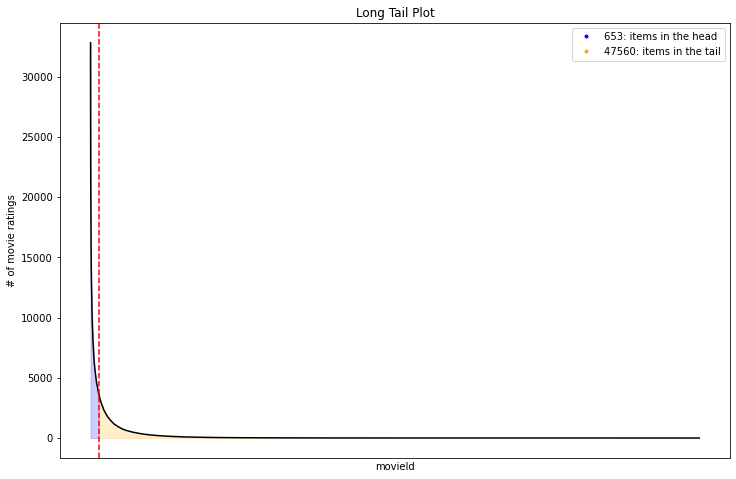

In [61]:
fig = plt.figure(figsize=(12, 8))
recmetrics.long_tail_plot(df=data, 
             item_id_column="movieId", 
             interaction_type="movie ratings", 
             percentage=0.5,
             x_labels=False)

The plot plot shows the distribution of ratings/movie popularity with 653 polpular movies and 45760 unpopular movies.

**Movie Ratings from the User**

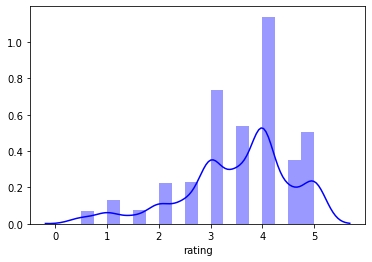

In [ ]:
# Distplot of ratings 
sns.distplot(df["rating"], color='blue');

**Exploring Movie Genres**

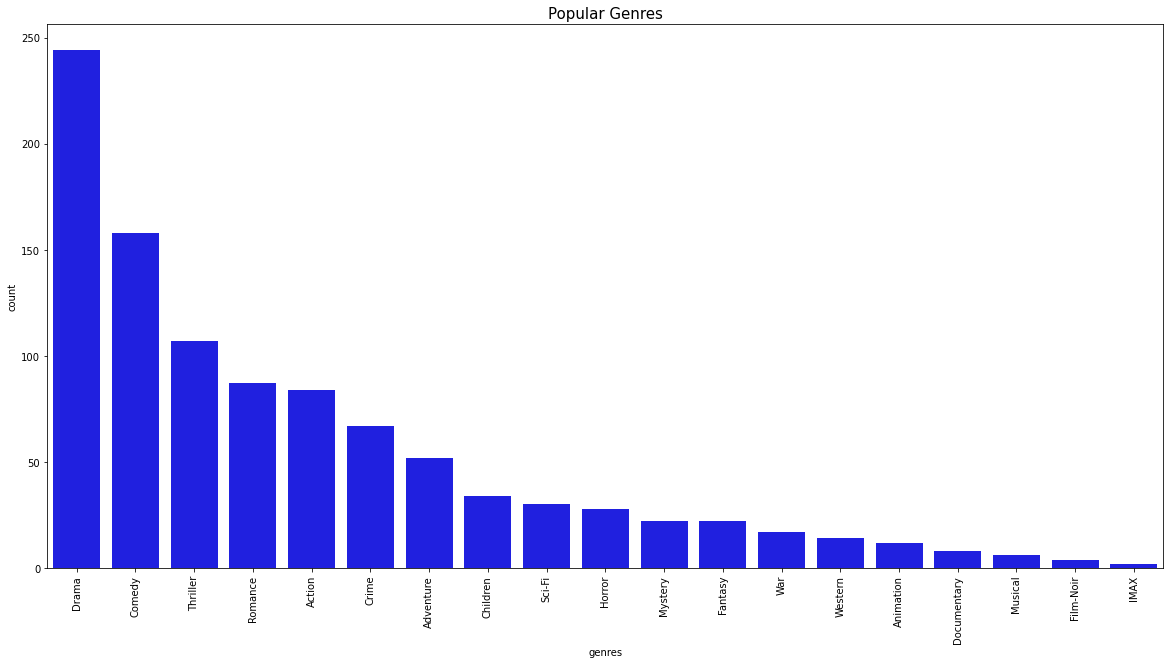

In [ ]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = df['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='blue')
ax.set_title('Popular Genres', fontsize=15)
plt.xticks(rotation =90)
plt.show()

Drama, Comedy and Thriller are top 3 most common movie genres.

#### Movies made per year 

Text(0.5, 1.0, 'Total Movies Released per Year')

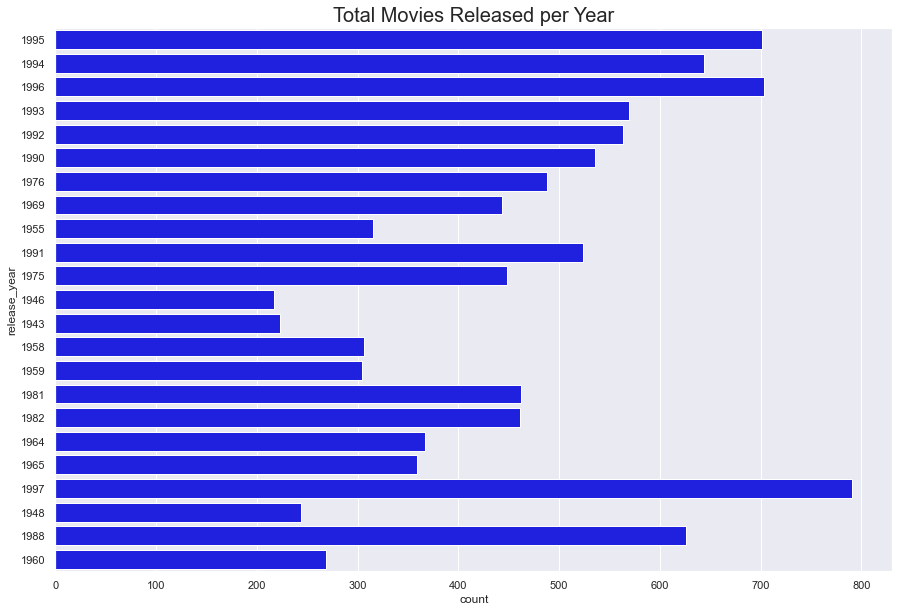

In [ ]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=movies['release_year'], data=df, order=df['release_year'].value_counts().index[0:30],color='blue')
ax.set_title('Total Movies Released per Year', fontsize= 20)

from 1955 The number of movies released each year increased, whereas it was previously fluctuating.

#### Popular Cast Members 

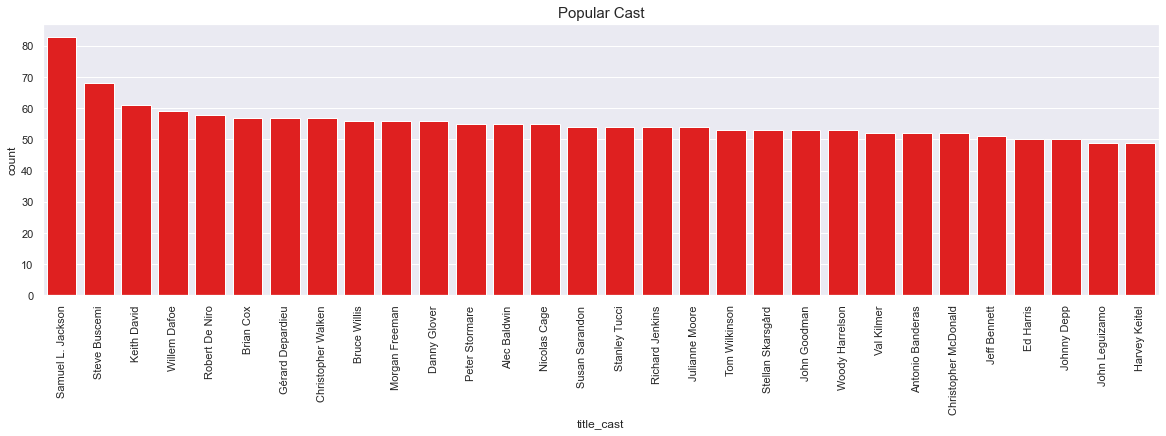

In [ ]:
# Plot popular cast
plt.figure(figsize = (20,5))
cast=imdb['title_cast'].explode()
ax=sns.countplot(x=cast, order = cast.value_counts().index[:30],color='red')
ax.set_title('Popular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The most well-known cast members are Samuel L. Jackson and Steve Buscemi, with the remaining members having a slight variation in recognition.

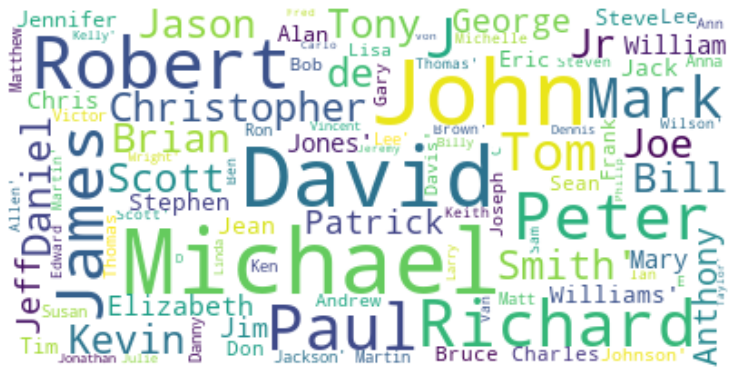

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
cast = df['title_cast'].explode()
text = list(set(cast))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Movie Runtime

In [ ]:
# Describe the runtime 
df['runtime'].describe()

count    467.000000
mean     109.119914
std       18.188763
min       76.000000
25%       96.500000
50%      107.000000
75%      117.000000
max      195.000000
Name: runtime, dtype: float64

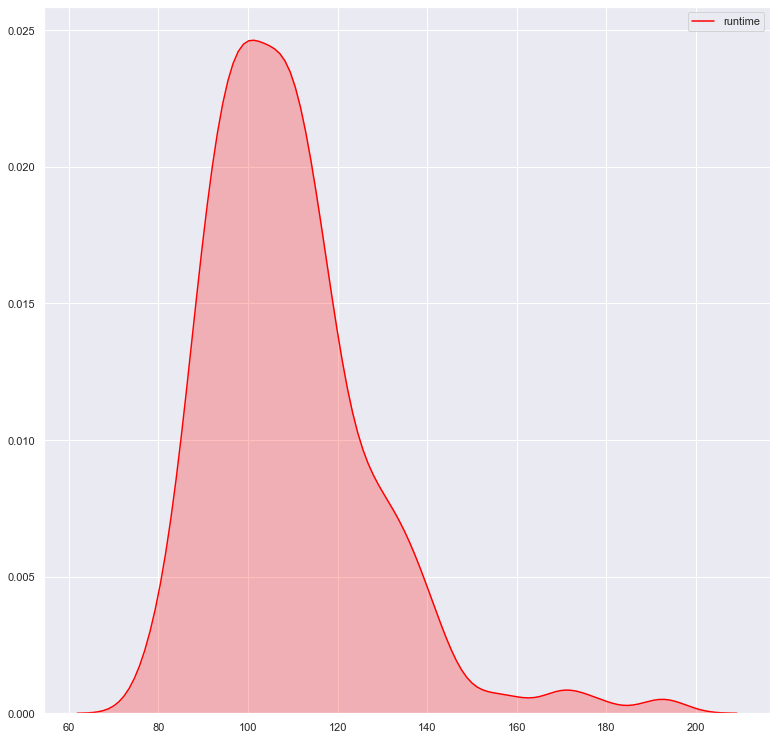

In [ ]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=df['runtime'], shade=True, color='red')

#### Long Movies

In [ ]:
#Show movies with long lengths 
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,release_year
523,195.0,"Scout, The (1994)",1994
13,192.0,Nixon (1995),1995
379,191.0,Bad Company (1995),1995
108,178.0,Braveheart (1995),1995
15,178.0,Casino (1995),1995
442,171.0,"Favor, The (1994)",1994
243,170.0,Hoop Dreams (1994),1994
657,170.0,Song of the Little Road (Pather Panchali) (1955),1955
5,170.0,Heat (1995),1995
558,160.0,Cronos (1993),1993


#### Short Movies 

In [ ]:
# Show movies with short lengths
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)

,runtime,title,release_year
547,76.0,Tombstone (1993),1993
236,78.0,"Goofy Movie, A (1995)",1995
653,79.0,Faithful (1996),1996
553,80.0,"Beans of Egypt, Maine, The (1994)",1994
814,80.0,Ransom (1996),1996
0,81.0,Toy Story (1995),1995
730,81.0,Force of Evil (1948),1948
47,81.0,Pocahontas (1995),1995
570,82.0,Andre (1994),1994
728,83.0,Brothers in Trouble (1995),1995


### Tags 

In [ ]:
tags = tags_df['tag']
tags.dropna(inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

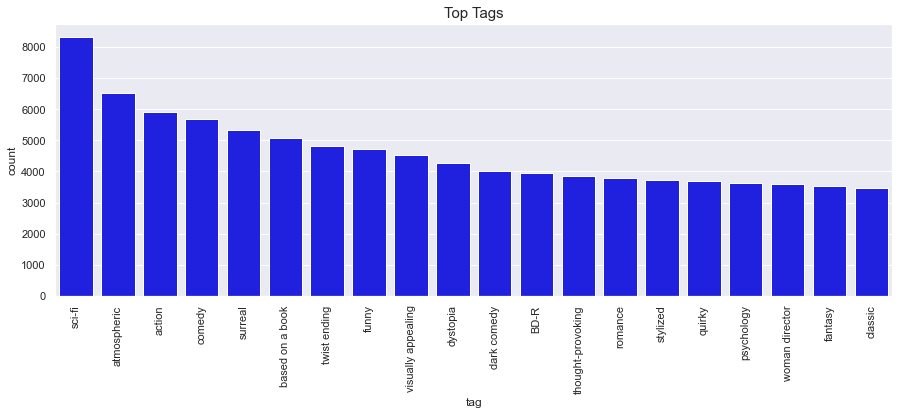

In [ ]:
#Plot tags 
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=tags, order = tags.value_counts().index[:20],color = 'blue')
ax.set_title('Top Tags', fontsize=15)
plt.xticks(rotation=90)
plt.show

<a id="features"></a>
## 5. **Feature engineering And Selection**

In this section, we extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

The features engineered for content-based and collaborative filtering are different because methods do not use the same dataset.

### **Content-based Filtering**

#### Feature Engineering

In [25]:
cols = ['title','genres','title_cast','director','plot_keywords']

#create new dataframe with useful data
data_df = train_df[cols]

#set index to movie titles
data_df.set_index('title', inplace = True)

data_df.head()

,genres,title_cast,director,plot_keywords
title,,,,
Toy Story (1995),"[adventure, animation, children, comedy, fantasy]","[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,"[toy, rivalry, cowboy, cgi animation]"
Jumanji (1995),"[adventure, children, fantasy]","[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,"[board game, adventurer, fight, game]"
Grumpier Old Men (1995),"[comedy, romance]","[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,"[boat, lake, neighbor, rivalry]"
Waiting to Exhale (1995),"[comedy, drama, romance]","[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,"[black american, husband wife relationship, be..."
Father of the Bride Part II (1995),[comedy],"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,"[fatherhood, doberman, dog, mansion]"


Now we create the bag of words from the genres, title_cast,director and plot keywords.

In [26]:
data_df['bag_of_words'] = ''
columns = data_df.columns
for index, row in data_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
data_df.drop(columns = [col for col in data_df.columns if col!= 'bag_of_words'], inplace = True)

**Vectorization**

The data we have is text, but machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. We make use of two vectorization techniques:

- CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

From the  bag of words, we generate numerical features.

In [27]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(data_df['bag_of_words'])
new_matrix = count_matrix
# creating a Series for the movie titles.
indices = pd.Series(data_df.index)
indices[:10]

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
5                           Heat (1995)
6                        Sabrina (1995)
7                   Tom and Huck (1995)
8                   Sudden Death (1995)
9                      GoldenEye (1995)
Name: title, dtype: object

**Feature scaling**

It is possible for features to have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards certain features. 

MaxAbsScaler estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.


In [ ]:
# initialise a scaler

scaler = MaxAbsScaler() 

scaled_new_matrix = scaler.fit_transform(new_matrix) # scaled new_matrix


### **Collaborative Filtering**

<a id="model"></a>
## 6. **Model Building And Evaluation**

The method of learning is unsupervised, hence this type of algorithm learns patterns from untagged data. The hope is that through mimicry, which is an important mode of learning in people, the machine is forced to build a compact internal representation of its world and then generate imaginative content from it. 

We use two forms of recommender system algorithms: content-based and collaborative filtering.

### **Content-based Filtering**

From the features engineered, we find the similarities within the data. This is done by computing the cosine similarity.

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.


In [28]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

With our content similarity matrix computed,     

We now do recommendations by: 

  1. Select an initial item (movie) to generate recommendations from. 
  2. Extract all the similarity values between the initial item and each other item in the similarity matrix.
  3. Sort the resulting values in descending order. 
  4. Select the top N similarity values, and return the corresponding item details to the user. This is now our simple top-N list.  
  
We implement this algorithmic process in the function below:

In [29]:
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(data_df.index)[i])
        
    return recommended_movies

In [ ]:
# recommendations for the movie
#recommendations('Hard Target (1993)')

In [62]:

preds = []
user_movie = []

for count in range(0,len(test)):
    
    a = test['movieId'][count]

    titlee = movies_df[movies_df['movieId'] == a]['title']
    dc = train_df[train_df['title'].isin(recommendations(titlee.values[0]))]['movieId'].head(10)
    A = train[train['movieId'].isin(dc)]['rating'].mean()
    

    preds.append(float(np.round(A,1)))

        
    movie_key = str(test['userId'][count])+ '_' + str(test['movieId'][count])
    
    user_movie.append(movie_key)
    
    
df_me = pd.DataFrame({'Id': user_movie, 'rating': preds})



IndexError: ignored

In [51]:
a = 459

titlee = movies_df[movies_df['movieId'] == a]['title']


In [ ]:
titlee.values[0]

In [55]:
print('The rating for this movie is {}'.format(np.round(A,1)))

The rating for this movie is 3.0


### **Collaborative Filtering**

<a id="evaluation"></a>
## 7. **Model Parameter Tuning**

In [6]:

params = {'n_epochs' : 12,
           'init_std_dev': 0.01,
           'n_factors' : 160,
          'model_name' : 'SVDpp'}

RMSE = 0.84443
metrics = RMSE

In [7]:
# log our parameters and results

experiment.log_parameters(params)

experiment.log_parameters(metrics)

In [8]:
# ending the experiment

experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/kwanda2426/streamlit-based-movie-recommender-system/d69f8ff97ef5447fa556f633a134fb40
COMET INFO:   Parameters:
COMET INFO:     imag         : 0.0
COMET INFO:     init_std_dev : 0.01
COMET INFO:     model_name   : SVDpp
COMET INFO:     n_epochs     : 12
COMET INFO:     n_factors    : 160
COMET INFO:     real         : 0.84443
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (10.63 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading 1 metrics, params a

<a id="conclusion"></a>
## 8. **Conclusion**

<a id="references"></a>
## 9. **References**

1. Hakami, A., 2022. Movie Recommendation system. [online] Medium. Available at: <https://medium.com/mlearning-ai/movie-recommendation-system-f2f57290b1b8> [Accessed 24 January 2022].

2. abramovsky, O., 2022. How to generate recommendations using TF-IDF. [online] Medium. Available at: <https://medium.com/codex/how-to-generate-recommendations-using-tf-idf-52d46eca606f> [Accessed 27 January 2022].

3. Youtube.com. 2022. Overview of recommender systems. [online] Available at: <https://www.youtube.com/watch?v=1JRrCEgiyHM> [Accessed 16 January 2022].

4. Youtube.com. 2022. Content-based Filtering. [online] Available at: <https://www.youtube.com/watch?v=2uxXPzm-7FY> [Accessed 16 January 2022].

5. Youtube.com. 2022. Collaborating Filtering. [online] Available at: <https://www.youtube.com/watch?v=h9gpufJFF-0> [Accessed 16 January 2022].